<a href="https://colab.research.google.com/github/takao8/MLTSAProject/blob/master/project_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import os
import xlrd
import numpy as np
import pandas as pd
import pylab as pl
from statsmodels.graphics.api import qqplot
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive

In [0]:
mydata = pd.read_excel('PJM_NEPOOL_hourly_data_Jan2000_Jul2019.xlsx')  #stat

In [0]:
# rounding everything to the nearest hour, since some values are a little off
mydata['Date'] = pd.to_datetime(mydata['Date']).dt.round('H')
mydata.set_index("Date", inplace=True)

# Summary

We'll be looking at a load graph.  In this circumstance, load is energy demand, the amount of energy that's consumed at a single point. 

There are four main types of seasonalities in this data:


*   Yearly: Energy demand is higher in the Summer/Winter as people turn on their heating or AC, and lower in Spring/Fall.
*   Weekly: Energy demand is higher on the weekdays as businesses and industry are running.
*   Daily: Energy demand is lower at night, and higher as the day starts and continues.
*   Seasonally: The daily energy demand looks different whether it's summer or winter.



# Yearly

Text(0.5, 1.0, 'Energy demand for 2015')

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


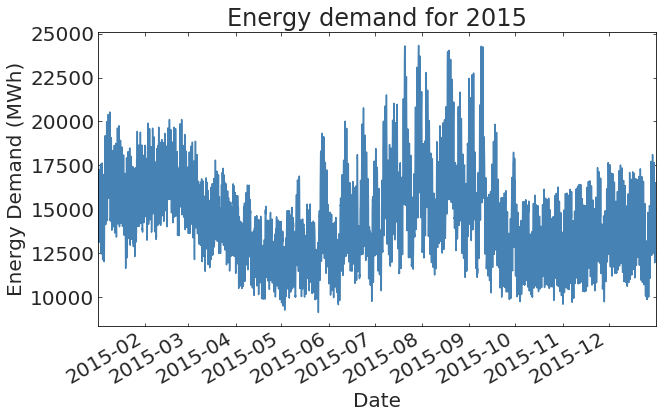

In [76]:
mydata.loc[(mydata.index > '2015-1-1') & (mydata.index < '2016-1-1')]["Nepool_Load_Hist"].plot()
pl.ylabel("Energy Demand (MWh)")
pl.title("Energy demand for 2015")

# Weekly

Text(0, 0.5, 'Energy Demand (MWh)')

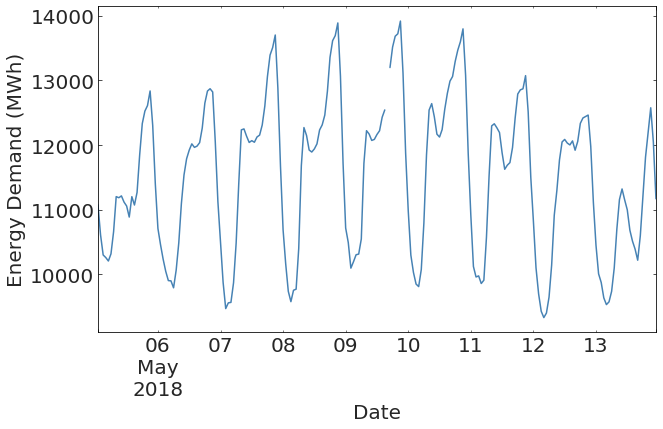

In [96]:
mydata.loc[(mydata.index > '2018-5-05') & (mydata.index < '2018-5-14')]["Nepool_Load_Hist"].plot()
pl.ylabel("Energy Demand (MWh)")

Note that the ticks indicate midnight, so our data starts at 12AM on May 5th, 2018

Note also May 7th = Monday, so we can see a sharp increase in energy demand starting on the 7th, which decreases back to lows on the 12th.

# Daily

Text(0.5, 1.0, 'Daily Oscillations for May 9th-May 11th, 2018')

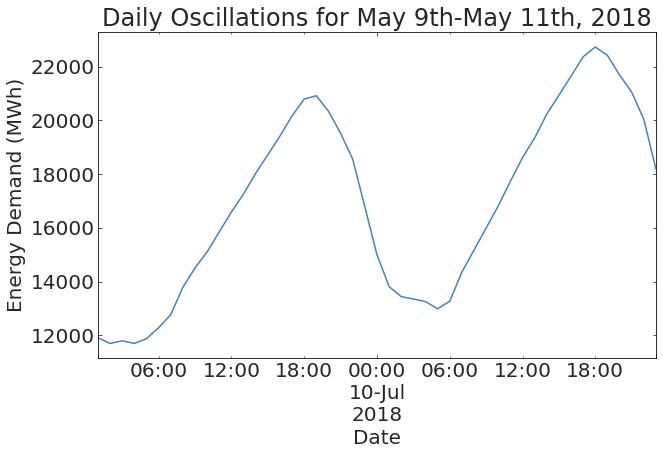

In [97]:
mydata.loc[(mydata.index > '2018-7-09') & (mydata.index < '2018-7-11')]["Nepool_Load_Hist"].plot()
pl.ylabel("Energy Demand (MWh)")
pl.title("Daily Oscillations for May 9th-May 11th, 2018")

So energy usage will (typically) peak around 6pm, decease through the night, and increase through the morning.

# Seasonal

The graph above was a good example for what energy usage looks like in the summer.

Text(0.5, 1.0, 'Daily Oscillations for May 9th-May 11th, 2018')

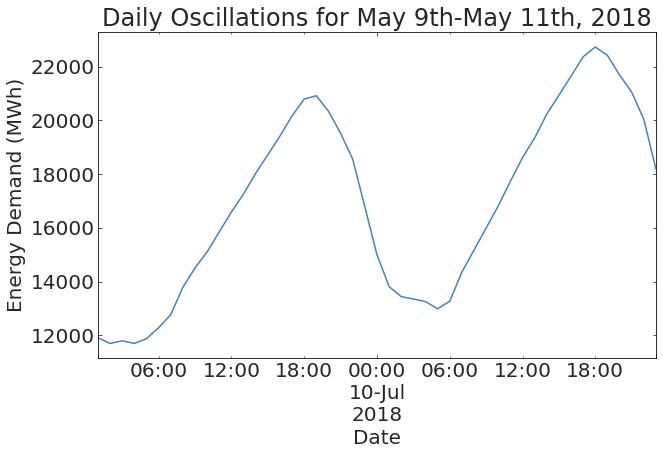

In [98]:
mydata.loc[(mydata.index > '2018-7-09') & (mydata.index < '2018-7-11')]["Nepool_Load_Hist"].plot()
pl.ylabel("Energy Demand (MWh)")
pl.title("Daily Oscillations for May 9th-May 11th, 2018")

In winter, there's a double peak:

Text(0.5, 1.0, 'Daily Oscillations for January 9th-January 11th, 2018')

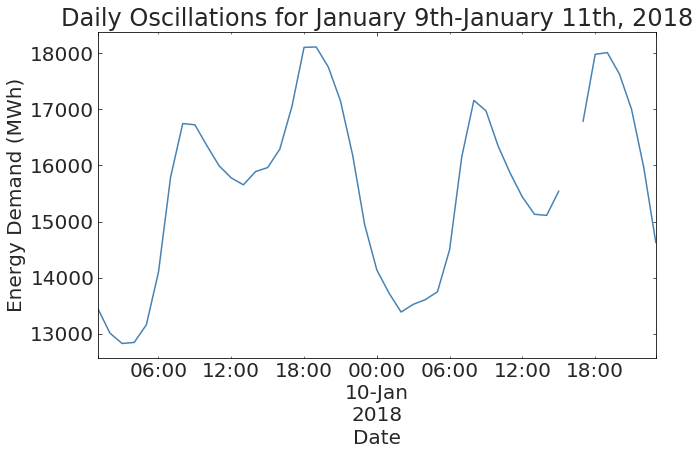

In [99]:
mydata.loc[(mydata.index > '2018-1-09') & (mydata.index < '2018-1-11')]["Nepool_Load_Hist"].plot()
pl.ylabel("Energy Demand (MWh)")
pl.title("Daily Oscillations for January 9th-January 11th, 2018")

Which could be explained by people turning their heat off when they leave to work.  

Note also that holidays act similar to weekends, decreasing the energy demand as businesses and industry close for the day.

Text(0.5, 1.0, 'Behavior of Energy Demand around July 4th, 2019')

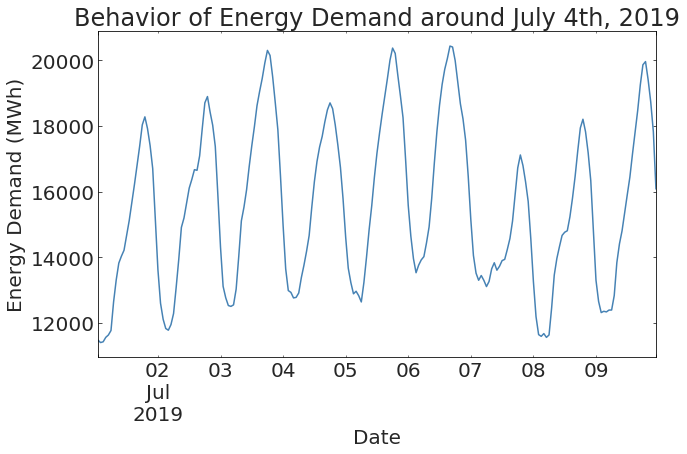

In [100]:
mydata.loc[(mydata.index < '2019-7-10') & (mydata.index > '2019-7-1')]["Nepool_Load_Hist"].plot()
pl.ylabel("Energy Demand (MWh)")
pl.title("Behavior of Energy Demand around July 4th, 2019")

# Final Notes

Overall, load doesn't behave too erratically, so it should be overall pretty easy to do some forecasting and check that our forecasting isn't overfit.  There's a lot of subproblems we can branch to if we don't think this is enough for the project, but we can decide that down the line.  Other notes:


*   Fall and Spring look like a transition between winter and summer--their load graphs are inbetween a double peak and a single peak
*   Weather intuitively has a strong correlation with energy usage, thus are great variables to use when forecasting future energy demand.
*   The other variables in the data (such as KBOS_HID_HIST) are temperature data.  The KBOS is the airport code, and indicates it's Loan Airport, just as KPHL indicates Philadelphia International


One last graph that's nice to look at is Temperature vs Energy Demand, which makes a U shape.  These are commonly used to show forecasting results.  Notice that at the ends (colder temperature and hotter temperature), energy demand curves up, as we would expect.

Text(0.5, 1.0, 'HID vs Energy Usage in Boston')

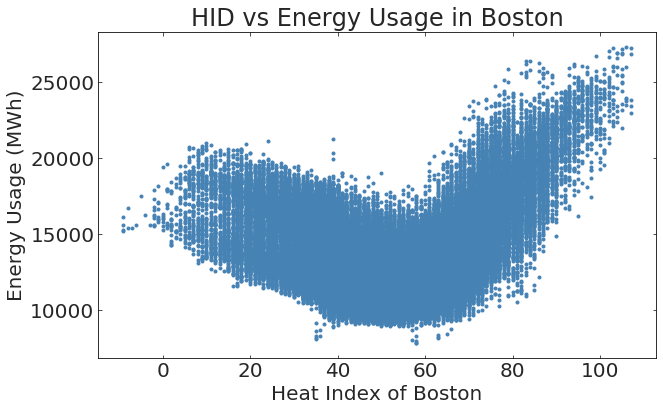

In [108]:
pl.plot(mydata['KBOS_HID_HIST'][100000:], mydata['Nepool_Load_Hist'][100000:], '.')
pl.xlabel('Heat Index of Boston')
pl.ylabel('Energy Usage (MWh)')
pl.title('HID vs Energy Usage in Boston')